\[Python Deployment](https://pycaret.gitbook.io/docs/get-started/functions/deploy)

In [1]:
!pip install -U openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd 
import numpy as np
import sklearn

import matplotlib.pyplot as plt
# pkg for interactive vis

import warnings
warnings.filterwarnings('ignore')
#把warning省略掉

%matplotlib inline

In [ ]:
# preprocessing native data
#df=pd.read_excel("gender-data/python身高體重表.xlsx")
# delete white space in '性別' column
#df['性別']=df['性別'].str.strip()
#df1=df[['身高','體重','Error','性別']].copy()
#df1.to_csv("gender-data/gender.csv",index=False)

In [2]:
file="https://raw.githubusercontent.com/cchuang2009/2022-1/main/Python_IM/gender.csv"
df=pd.read_csv(file)
df

,身高,體重,fake,性別
0,164,47,NaN,女
1,185,55,NaN,男
2,168,48,F,女
3,160,47,NaN,女
4,155,45,NaN,女
5,182,70,T,男
6,183,66,T,男
7,166,47,F,男
8,170,56,T,男
9,174,70,T,男


In [3]:
# encoding '性別' and fake
# '性別' : '女'➜ 0, '男'➜ 1
# 'fake': 'F'➜ 1, else ➜ 0

df['性別'] = df['性別'].map({'女': 0, '男': 1})
df['fake']=df['fake'].apply(lambda x: 1 if x=='F' else 0)

In [6]:
df

,身高,體重,fake,性別
0,164,47,0,0
1,185,55,0,1
2,168,48,1,0
3,160,47,0,0
4,155,45,0,0
5,182,70,0,1
6,183,66,0,1
7,166,47,1,1
8,170,56,0,1
9,174,70,0,1


In [7]:
!pip install --pre pycaret --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 6.4 MB/s 


In [6]:
!pip install sktime category_encoders scikit_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires kaleido>=0.2.1, which is not installed.
pycaret 3.0.0rc4 requires plotly-resampler>=0.7.2.2, which is not installed.
pycaret 3.0.0rc4 requires pmdarima!=1.8.1,<2.0.0,>=1.8.0, which is not installed.
pycaret 3.0.0rc4 requires pyod>=0.9.8, which is not installed.
pycaret 3.0.0rc4 requires schemdraw>=0.14, which is not installed.
pycaret 3.0.0rc4 requires tbats>=1.1.0, which is not installed.
pycaret 3.0.0rc4 requires lightgbm>=3.0.0, but you have lightgbm 2.2.3 which is incompatible.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.2.2 which is incompatible.
pycaret 3.0.0rc4 requires numba~=0.55.0, but you have numba 0.56.4 which is incompatible.
pycaret 3.0.0rc4 requires

In [7]:
from pycaret.classification import *

In [8]:
data=df[['身高','體重','性別']]

reg1 = setup(data = data, target = '性別')

,Description,Value
0,Session id,6226
1,Target,性別
2,Target type,Binary
3,Original data shape,"(36, 3)"
4,Transformed data shape,"(36, 3)"
5,Transformed train set shape,"(25, 3)"
6,Transformed test set shape,"(11, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9000,0.9750,0.9500,0.9167,0.9133,0.7800,0.8000,0.0110
qda,Quadratic Discriminant Analysis,0.9000,0.9500,0.9500,0.9167,0.9133,0.7800,0.8000,0.0090
gbc,Gradient Boosting Classifier,0.9000,0.9250,0.9500,0.9167,0.9133,0.7800,0.8000,0.0180
lr,Logistic Regression,0.8833,1.0000,0.8500,0.8500,0.8333,0.7800,0.8000,0.3970
ridge,Ridge Classifier,0.8833,0.0000,0.8500,0.8500,0.8333,0.7800,0.8000,0.0080
lda,Linear Discriminant Analysis,0.8833,1.0000,0.8500,0.8500,0.8333,0.7800,0.8000,0.0100
dt,Decision Tree Classifier,0.8667,0.8750,0.9500,0.9000,0.8967,0.7400,0.7500,0.0100
rf,Random Forest Classifier,0.8667,0.9000,0.9500,0.9000,0.8967,0.7400,0.7500,0.0530
ada,Ada Boost Classifier,0.8667,0.9000,0.9500,0.9000,0.8967,0.7400,0.7500,0.0250
catboost,CatBoost Classifier,0.8667,0.9500,0.9500,0.9000,0.8967,0.7400,0.7500,0.5270


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
# decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.3333,0.5000,1.0000,0.3333,0.5000,0.0000,0.0000
5,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=6226, splitter='best')


In [11]:
# tuned dt model
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.5000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.5000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [12]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       random_state=6226, splitter='best')


1. [AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

An ROC curve plots `TPR(Y)` vs. `FPR(X)` at different classification thresholds
```
         Observations
      |   T   |  F  
   ---|-------|-------
      |       |
 P  T |  TP   |  FP
 r    |       |
 e ---|-------|-------
 d    |       |
    F |  FN   |  TN
      |
      
          TP 
TPR = ----------
        TP + FN

          FP        
FPR = -----------
        FP + TN
```  
AUC stands for "Area under the ROC Curve." 

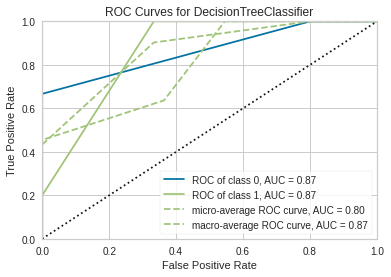

In [13]:
plot_model(tuned_dt, plot = 'auc')

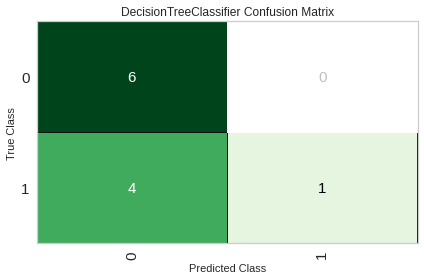

In [14]:
# performance depends on the size of samples, here due to the small size of test samples
plot_model(tuned_dt, plot = 'confusion_matrix')

In [15]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6364,0.8667,0.2000,1.0000,0.3333,0.2143,0.3464


,身高,體重,性別,prediction_label,prediction_score
25,169.0,82.0,1,0,0.625
26,164.0,47.0,0,0,0.875
27,170.0,47.0,1,0,0.625
28,162.0,52.0,0,0,0.875
29,168.0,62.0,0,0,0.625
30,163.0,62.0,0,0,0.875
31,170.0,56.0,1,0,0.625
32,168.0,65.0,0,0,0.625
33,162.0,62.0,0,0,0.875
34,172.0,51.0,1,1,1.000


In [16]:
final_dt = finalize_model(tuned_dt)

In [17]:
save_model(final_dt,'2022_12_8')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['身高', '體重'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator...
                  TransformerWrapper(exclude=[], include=None,
                                     transformer=VarianceThreshold(threshold=0))),
                 ('actual_estimat

In [18]:
input_data=pd.DataFrame(data={'身高':[160],'體重':[50]}) 
input_data

,身高,體重
0,160,50


In [19]:
#final_dt.predict([[150],[40]])
#input_data=data[-3:] 
predict_model(tuned_dt,data=input_data)

,身高,體重,prediction_label,prediction_score
0,160.0,50.0,0,0.875


In [ ]:
tuned_dt.predict([[160,50]])

array([0], dtype=int8)

In [ ]:
predict_model(tuned_dt,data=input_data)['prediction_label']
#predict_model(tuned_dt,data=input_data)['prediction_label'][0]

0    0
Name: prediction_label, dtype: int64

In [ ]:
import numpy as np
sample=[160,50]
sample_list=np.array(sample).reshape(1, -1)

In [ ]:
tuned_dt.predict(sample_list)

array([0], dtype=int8)

In [ ]:
sample_list

array([[160,  50]])

In [ ]:
list(input_data.iloc[0,:])

[160, 50]

In [ ]:
tuned_dt.predict(sample_list)

array([0], dtype=int8)

In [ ]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=531, splitter='best')

In [20]:
from sklearn import tree

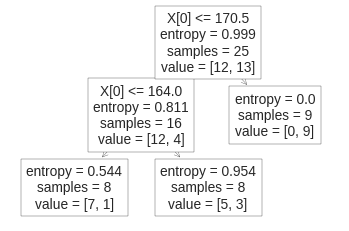

In [22]:
tree.plot_tree(tuned_dt);

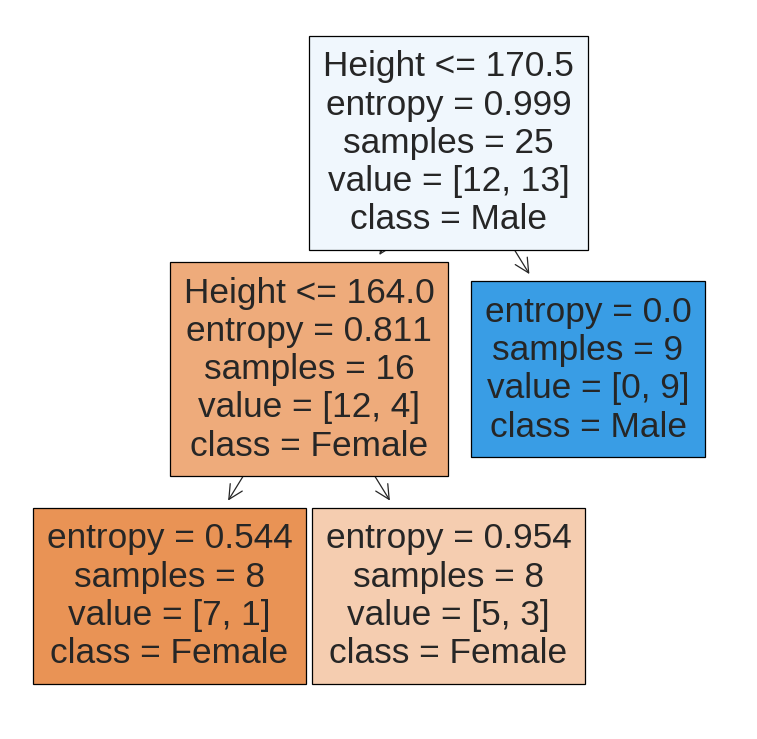

In [21]:
fn=['Height', 'Weight']
cn=["Female","Male"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(tuned_dt,feature_names = fn, 
               class_names=cn,filled = True);